In [16]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_absolute_error, mean_squared_error, r2_score


In [8]:

# Load dataset
df = pd.read_csv('ADANIPORTS.csv')

# Convert Date and sort
df['Date'] = pd.to_datetime(df['Date'])
df = df.sort_values('Date').reset_index(drop=True)

df.head()


,Date,Symbol,Series,Prev Close,Open,High,Low,Last,Close,VWAP,Volume,Turnover,Trades,Deliverable Volume,%Deliverble
0,2007-11-27,MUNDRAPORT,EQ,440.00,770.00,1050.00,770.0,959.0,962.90,984.72,27294366,2.687719e+15,NaN,9859619,0.3612
1,2007-11-28,MUNDRAPORT,EQ,962.90,984.00,990.00,874.0,885.0,893.90,941.38,4581338,4.312765e+14,NaN,1453278,0.3172
2,2007-11-29,MUNDRAPORT,EQ,893.90,909.00,914.75,841.0,887.0,884.20,888.09,5124121,4.550658e+14,NaN,1069678,0.2088
3,2007-11-30,MUNDRAPORT,EQ,884.20,890.00,958.00,890.0,929.0,921.55,929.17,4609762,4.283257e+14,NaN,1260913,0.2735
4,2007-12-03,MUNDRAPORT,EQ,921.55,939.75,995.00,922.0,980.0,969.30,965.65,2977470,2.875200e+14,NaN,816123,0.2741


In [9]:

# Create target columns
df['Next_Day_Close'] = df['Close'].shift(-1)
df['Next_Day_Return'] = (df['Next_Day_Close'] - df['Close']) / df['Close']

df = df.dropna()
df[['Date','Close','Next_Day_Close','Next_Day_Return']].head()


,Date,Close,Next_Day_Close,Next_Day_Return
866,2011-06-01,164.00,161.25,-0.016768
867,2011-06-02,161.25,161.05,-0.001240
868,2011-06-03,161.05,159.85,-0.007451
869,2011-06-06,159.85,157.25,-0.016265
870,2011-06-07,157.25,154.90,-0.014944


In [10]:

# Feature selection
features = ['Prev Close','Open','High','Low','Close','Volume']
target = 'Next_Day_Close'

X = df[features]
y = df[target]

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, shuffle=False
)

X_train.shape, X_test.shape


((1964, 6), (491, 6))

In [11]:

# Linear Regression
from sklearn.linear_model import LinearRegression

lr = LinearRegression()
lr.fit(X_train, y_train)
pred_lr = lr.predict(X_test)

print("Linear Regression")
print("R2:", r2_score(y_test, pred_lr))
print("MAE:", mean_absolute_error(y_test, pred_lr))
print("RMSE:", mean_squared_error(y_test, pred_lr))


Linear Regression
R2: 0.9914629575604184
MAE: 6.946250789597956
RMSE: 126.62270299847549


In [12]:

# Decision Tree Regressor
from sklearn.tree import DecisionTreeRegressor

dt = DecisionTreeRegressor(max_depth=8, random_state=42)
dt.fit(X_train, y_train)
pred_dt = dt.predict(X_test)

print("Decision Tree")
print("R2:", r2_score(y_test, pred_dt))
print("MAE:", mean_absolute_error(y_test, pred_dt))
print("RMSE:", mean_squared_error(y_test, pred_dt))


Decision Tree
R2: 0.4329213915271545
MAE: 39.714569168885795
RMSE: 8410.99557904559


In [13]:

# Random Forest Regressor
from sklearn.ensemble import RandomForestRegressor

rf = RandomForestRegressor(
    n_estimators=200,
    max_depth=10,
    random_state=42,
    n_jobs=-1
)
rf.fit(X_train, y_train)
pred_rf = rf.predict(X_test)

print("Random Forest")
print("R2:", r2_score(y_test, pred_rf))
print("MAE:", mean_absolute_error(y_test, pred_rf))
print("RMSE:", mean_squared_error(y_test, pred_rf))


Random Forest
R2: 0.4026717202292962
MAE: 40.25021611923862
RMSE: 8859.663272999085


In [15]:

# Model comparison
results = pd.DataFrame({
    'Model': ['Linear Regression', 'Decision Tree', 'Random Forest'],
    'R2 Score': [
        r2_score(y_test, pred_lr),
        r2_score(y_test, pred_dt),
        r2_score(y_test, pred_rf)
    ],
    'MAE': [
        mean_absolute_error(y_test, pred_lr),
        mean_absolute_error(y_test, pred_dt),
        mean_absolute_error(y_test, pred_rf)
    ],
    'RMSE': [
        mean_squared_error(y_test, pred_lr),
        mean_squared_error(y_test, pred_dt),
        mean_squared_error(y_test, pred_rf)
    ]
})

results


,Model,R2 Score,MAE,RMSE
0,Linear Regression,0.991463,6.946251,126.622703
1,Decision Tree,0.432921,39.714569,8410.995579
2,Random Forest,0.402672,40.250216,8859.663273


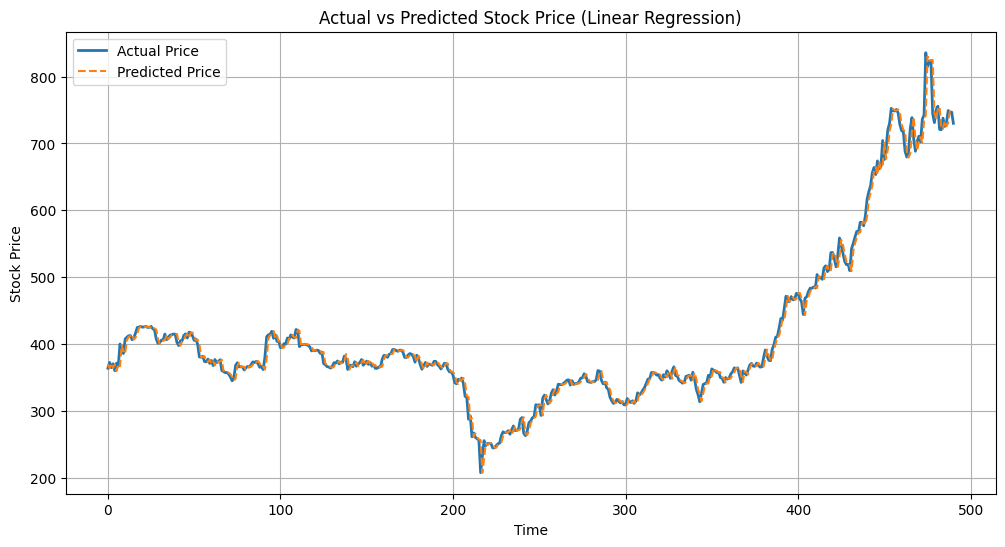

In [17]:

# Use predictions from your trained model
# y_test -> actual values
# pred_lr -> predicted values (Linear Regression)

plt.figure(figsize=(12, 6))
plt.plot(y_test.values, label='Actual Price', linewidth=2)
plt.plot(pred_lr, label='Predicted Price', linestyle='--')

plt.title('Actual vs Predicted Stock Price (Linear Regression)')
plt.xlabel('Time')
plt.ylabel('Stock Price')
plt.legend()
plt.grid(True)
plt.show()


In [18]:
import pickle as pk
pk.dump(lr,open('Stock_Prediction.pkl','wb'))
